# Métodos Explícito,  Implícito y Crank-Nicolson(Julia)

- Mitchell Mirano Caro
- Jhonnatan Williams Torres Condezo


$$u_{t} = u_{xx} - u_{x} +u , 0\leq x \leq 1$$
$$u_{x}(0,t) = 2t, u(1,t) = \frac{t²}{2}, t > 0$$
$$u(x,0) = \sin(x) + \cos(x)$$



In [454]:
using Plots,Printf, LinearAlgebra

## Definiendo descomposición LU y el método de Crout

In [455]:
function lu_descomposition(A::Tridiagonal{Float64, Vector{Float64}})
    
    n = length(A[1,:])
    L = zeros(n,n)
    U = zeros(n,n)

    
    L[1,1] = A[1,1]
    U[1,1] = 1
    U[1,2] = A[1,2]/L[1,1]

    for i in 2:n

        if i <n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
            U[i,i+1] =A[i,i+1]/L[i,i]
        end

        if i==n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
        end

    end
    
    return L, U
end

function crow_method(A::Tridiagonal{Float64, Vector{Float64}},b::Vector{Float64})
    
    n = length(b)
    L,U = lu_descomposition(A)
    
    z = zeros(n)
    z[1] = b[1]/L[1,1]

    for i in 2:n
        z[i] = b[i]/L[i,i] - L[i,i-1]*z[i-1]/L[i,i]
    end

    x = zeros(n)
    x[n] = z[n]

    for i in n:-1:2
        x[i-1] = z[i-1] - U[i-1,i]*x[i]
    end

    return x

end

crow_method (generic function with 1 method)

## Definiendo parametros iniciales

In [456]:
a,b = 0,1
t_min, t_max = 0,1

ci = x -> sin.(x) + cos.(x)
cc = t -> t.^2/2

h = 0.1
k = 0.0005

xn = Int((b-a)/h)
tn  = Int((t_max-t_min)/k)

x = LinRange(a, b, xn+1)
t = LinRange(t_min, t_max, tn+1)
display(x)
display(t)

11-element LinRange{Float64, Int64}:
 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0

2001-element LinRange{Float64, Int64}:
 0.0, 0.0005, 0.001, 0.0015, 0.002, …, 0.998, 0.9985, 0.999, 0.9995, 1.0

## Método Explícito

In [457]:
di = fill(k/(h^2),xn-1)
d  = fill(-2*k/(h^2) + k/h + k + 1 ,xn)
ds = fill(k/(h^2) - k/h,xn-1)

A  = Tridiagonal(di, d, ds)
A[1,1] = -k/(h^2) + k/h + k + 1
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
 0.9555  0.045    ⋅       ⋅       ⋅      …   ⋅       ⋅       ⋅       ⋅ 
 0.05    0.9055  0.045    ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
  ⋅      0.05    0.9055  0.045    ⋅          ⋅       ⋅       ⋅       ⋅ 
  ⋅       ⋅      0.05    0.9055  0.045       ⋅       ⋅       ⋅       ⋅ 
  ⋅       ⋅       ⋅      0.05    0.9055      ⋅       ⋅       ⋅       ⋅ 
  ⋅       ⋅       ⋅       ⋅      0.05    …  0.045    ⋅       ⋅       ⋅ 
  ⋅       ⋅       ⋅       ⋅       ⋅         0.9055  0.045    ⋅       ⋅ 
  ⋅       ⋅       ⋅       ⋅       ⋅         0.05    0.9055  0.045    ⋅ 
  ⋅       ⋅       ⋅       ⋅       ⋅          ⋅      0.05    0.9055  0.045
  ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅      0.05    0.9055

In [458]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = ci(x)
S[2:tn+1,xn+1] = cc(t[2:tn+1])
S

2001×11 Matrix{Float64}:
 1.0  1.09484  1.17874  1.25086  1.31048  …  1.41406  1.40494  1.38177
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.25e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      5.0e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      2.0e-6
 0.0  0.0      0.0      0.0      0.0      …  0.0      0.0      3.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      4.5e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      6.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      8.0e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.0125e-5
 ⋮                                        ⋱                    ⋮
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496008
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496506
 0.0  0.0      0.0      0.0      0.0         0.0      0

In [459]:
for j in 1:tn
    C = zeros(xn)
    C[1] = -(2*k/h)*(t[j])
    C[xn] = (k/h^2  - k/h)*S[j,xn+1]
    S[j+1,1:xn] = A*S[j,1:xn] + C
end
S

2001×11 Matrix{Float64}:
  1.0       1.09484    1.17874    1.25086   …  1.41406   1.40494   1.38177
  1.00477   1.09442    1.17838    1.25056      1.41411   1.40505   1.25e-7
  1.0093    1.09426    1.17802    1.25026      1.41415   1.34298   5.0e-7
  1.01362   1.09433    1.17767    1.24996      1.4114    1.28678   1.125e-6
  1.01774   1.09459    1.17734    1.24967      1.40638   1.23575   2.0e-6
  1.02169   1.09502    1.17705    1.24937   …  1.39953   1.18929   3.125e-6
  1.02547   1.09559    1.17679    1.24907      1.39121   1.14688   4.5e-6
  1.02911   1.09629    1.17657    1.24879      1.38174   1.10806   6.125e-6
  1.03261   1.09709    1.1764     1.2485       1.37137   1.07243   8.0e-6
  1.03599   1.09798    1.17626    1.24823      1.36032   1.03966   1.0125e-5
  ⋮                                         ⋱                      ⋮
 -1.15475  -0.964784  -0.784478  -0.613688     0.15554   0.317483  0.496008
 -1.15674  -0.966651  -0.7862    -0.615241     0.155274  0.317579  0.496506
 -1

In [460]:
println("x \t\t S(x,t) ")
for (index, value) in enumerate(S[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, xi, xi, t_max, value)
end

x 		 S(x,t) 
x_1 = 0.00 	 U(0.00,1.00) = -1.17e+00 
x_2 = 0.10 	 U(0.10,1.00) = -9.80e-01 
x_3 = 0.20 	 U(0.20,1.00) = -7.98e-01 
x_4 = 0.30 	 U(0.30,1.00) = -6.26e-01 
x_5 = 0.40 	 U(0.40,1.00) = -4.62e-01 
x_6 = 0.50 	 U(0.50,1.00) = -3.06e-01 
x_7 = 0.60 	 U(0.60,1.00) = -1.53e-01 
x_8 = 0.70 	 U(0.70,1.00) = -1.81e-03 
x_9 = 0.80 	 U(0.80,1.00) = 1.53e-01 
x_10 = 0.90 	 U(0.90,1.00) = 3.18e-01 
x_11 = 1.00 	 U(1.00,1.00) = 5.00e-01 


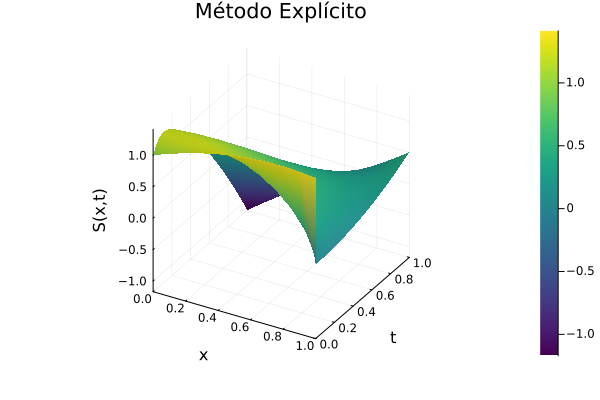

In [461]:
surface(x, t, S, camera=(30,30), 
        c=:viridis, 
        title="Método Explícito",
        xlabel="x",ylabel="t",
        zlabel="S(x,t)")

## Método Implícito

In [462]:
di = fill(-(k/(h^2) + k/(2*h)),xn-1)
d  = fill(2*k/(h^2) - k + 1,xn)
ds = fill(-k/(h^2) + k/(2*h),xn-1)
A  = Tridiagonal(di, d, ds)
A[1,2] = -2*k/(h^2)
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
  1.0995  -0.1       ⋅        ⋅      …    ⋅        ⋅        ⋅        ⋅ 
 -0.0525   1.0995  -0.0475    ⋅           ⋅        ⋅        ⋅        ⋅ 
   ⋅      -0.0525   1.0995  -0.0475       ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅      -0.0525   1.0995       ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅      -0.0525       ⋅        ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅      …  -0.0475    ⋅        ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅          1.0995  -0.0475    ⋅        ⋅ 
   ⋅        ⋅        ⋅        ⋅         -0.0525   1.0995  -0.0475    ⋅ 
   ⋅        ⋅        ⋅        ⋅           ⋅      -0.0525   1.0995  -0.0475
   ⋅        ⋅        ⋅        ⋅           ⋅        ⋅      -0.0525   1.0995

In [463]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = ci(x)
S[2:tn+1,xn+1] = cc(t[2:tn+1])
S

2001×11 Matrix{Float64}:
 1.0  1.09484  1.17874  1.25086  1.31048  …  1.41406  1.40494  1.38177
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.25e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      5.0e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      2.0e-6
 0.0  0.0      0.0      0.0      0.0      …  0.0      0.0      3.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      4.5e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      6.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      8.0e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.0125e-5
 ⋮                                        ⋱                    ⋮
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496008
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496506
 0.0  0.0      0.0      0.0      0.0         0.0      0

In [464]:
for j in 1:tn
    
    C = zeros(xn)
    C[1] = -(k/(h^2) + k/(2*h))*4*h*t[j+1]
    C[xn] = (k/(h^2) - k/(2*h))*S[j+1,xn+1]

    B = S[j,1:xn] + C
    S[j+1,1:xn] = crow_method(A, B)
end
S

2001×11 Matrix{Float64}:
 1.0         1.09484     1.17874     …  1.41406     1.40494     1.38177
 1.01306     1.13866     1.17503        1.40449     1.33847     1.25e-7
 1.02867     1.17986     1.17319        1.39283     1.27752     5.0e-7
 1.04641     1.21893     1.17296        1.37949     1.2215      1.125e-6
 1.06594     1.25629     1.17413        1.36479     1.16992     2.0e-6
 1.08696     1.29229     1.17653     …  1.34902     1.12233     3.125e-6
 1.10925     1.32721     1.18002        1.33242     1.07833     4.5e-6
 1.13261     1.36129     1.18447        1.31519     1.03756     6.125e-6
 1.15689     1.39472     1.1898         1.29751     0.999722    8.0e-6
 1.18196     1.42767     1.19591        1.2795      0.964529    1.0125e-5
 ⋮                                   ⋱                          ⋮
 2.82428e12  3.20945e12  1.73235e12     3.92153e10  1.63918e10  0.496008
 2.86479e12  3.25548e12  1.75719e12     3.97776e10  1.66268e10  0.496506
 2.90587e12  3.30216e12  1.78239e12     4.

In [465]:
println("x \t\t S(x,t) ")
for (index, value) in enumerate(S[tn+1,:])
    xi =  a + (index-1)*h
    @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.2e \n", index, xi, xi, t_max, value)
end

x 		 S(x,t) 
x_1 = 0.00 	 S(0.00,1.00) = 3.17e+12 
x_2 = 0.10 	 S(0.10,1.00) = 3.60e+12 
x_3 = 0.20 	 S(0.20,1.00) = 1.94e+12 
x_4 = 0.30 	 S(0.30,1.00) = 1.05e+12 
x_5 = 0.40 	 S(0.40,1.00) = 5.65e+11 
x_6 = 0.50 	 S(0.50,1.00) = 3.05e+11 
x_7 = 0.60 	 S(0.60,1.00) = 1.64e+11 
x_8 = 0.70 	 S(0.70,1.00) = 8.68e+10 
x_9 = 0.80 	 S(0.80,1.00) = 4.39e+10 
x_10 = 0.90 	 S(0.90,1.00) = 1.84e+10 
x_11 = 1.00 	 S(1.00,1.00) = 5.00e-01 


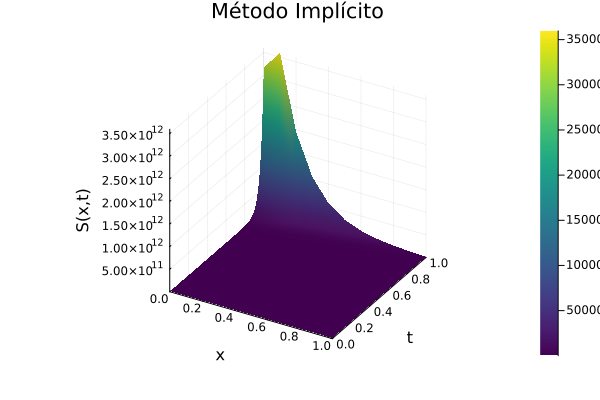

In [466]:
surface(x, t, S, camera=(30,30), 
        c=:viridis, title="Método Implícito",
        xlabel="x",ylabel="t",zlabel="S(x,t)")

## Crank-Nicolson

In [467]:
Adi = fill(-(k/(2*h^2) + k/(4*h)),xn-1)
Ad  = fill(1 + k/h^2 - k/2,xn)
Ads = fill(-k/(2*h^2) + k/(4*h),xn-1)
A  = Tridiagonal(Adi, Ad, Ads)  
A[1,2] = -k/(h^2)
A

10×10 Tridiagonal{Float64, Vector{Float64}}:
  1.04975  -0.05       ⋅         ⋅       …    ⋅         ⋅         ⋅ 
 -0.02625   1.04975  -0.02375    ⋅            ⋅         ⋅         ⋅ 
   ⋅       -0.02625   1.04975  -0.02375       ⋅         ⋅         ⋅ 
   ⋅         ⋅       -0.02625   1.04975       ⋅         ⋅         ⋅ 
   ⋅         ⋅         ⋅       -0.02625       ⋅         ⋅         ⋅ 
   ⋅         ⋅         ⋅         ⋅       …    ⋅         ⋅         ⋅ 
   ⋅         ⋅         ⋅         ⋅          -0.02375    ⋅         ⋅ 
   ⋅         ⋅         ⋅         ⋅           1.04975  -0.02375    ⋅ 
   ⋅         ⋅         ⋅         ⋅          -0.02625   1.04975  -0.02375
   ⋅         ⋅         ⋅         ⋅            ⋅       -0.02625   1.04975

In [468]:
Bdi = fill((k/(2*h^2) + k/(4*h)),xn-1)
Bd  = fill(1 - k/h^2 + k/2,xn)
Bds = fill(k/(2*h^2) - k/(4*h),xn-1)
B  = Tridiagonal(Bdi, Bd, Bds)  
B[1,2] = k/(h^2)
B

10×10 Tridiagonal{Float64, Vector{Float64}}:
 0.95025  0.05      ⋅        ⋅       …   ⋅        ⋅        ⋅        ⋅ 
 0.02625  0.95025  0.02375   ⋅           ⋅        ⋅        ⋅        ⋅ 
  ⋅       0.02625  0.95025  0.02375      ⋅        ⋅        ⋅        ⋅ 
  ⋅        ⋅       0.02625  0.95025      ⋅        ⋅        ⋅        ⋅ 
  ⋅        ⋅        ⋅       0.02625      ⋅        ⋅        ⋅        ⋅ 
  ⋅        ⋅        ⋅        ⋅       …  0.02375   ⋅        ⋅        ⋅ 
  ⋅        ⋅        ⋅        ⋅          0.95025  0.02375   ⋅        ⋅ 
  ⋅        ⋅        ⋅        ⋅          0.02625  0.95025  0.02375   ⋅ 
  ⋅        ⋅        ⋅        ⋅           ⋅       0.02625  0.95025  0.02375
  ⋅        ⋅        ⋅        ⋅           ⋅        ⋅       0.02625  0.95025

In [469]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = ci(x)
S[2:tn+1,xn+1] = cc(t[2:tn+1])
S

2001×11 Matrix{Float64}:
 1.0  1.09484  1.17874  1.25086  1.31048  …  1.41406  1.40494  1.38177
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.25e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      5.0e-7
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      2.0e-6
 0.0  0.0      0.0      0.0      0.0      …  0.0      0.0      3.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      4.5e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      6.125e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      8.0e-6
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      1.0125e-5
 ⋮                                        ⋱                    ⋮
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496008
 0.0  0.0      0.0      0.0      0.0         0.0      0.0      0.496506
 0.0  0.0      0.0      0.0      0.0         0.0      0

In [470]:
for j in 1:tn
    C = zeros(xn)
    C[1] = -(k/(2*h^2) + k/(4*h))*4*h*(t[j] + t[j+1])
    C[xn] = (k/(2*h^2) - k/(4*h))*(S[j,xn+1] + S[j+1,xn+1])
    bx = B*S[j,1:xn] + C
    S[j+1,1:xn] = crow_method(A, bx)
end
S

2001×11 Matrix{Float64}:
      1.0             1.09484    …     1.41406     1.40494  1.38177
      1.01058         1.11748          1.40985     1.37029  1.25e-7
      1.02225         1.13871          1.40367     1.30742  5.0e-7
      1.03476         1.15878          1.39517     1.25016  1.125e-6
      1.04794         1.17788          1.38482     1.19788  2.0e-6
      1.06164         1.19619    …     1.37299     1.15004  3.125e-6
      1.07575         1.21385          1.35999     1.10613  4.5e-6
      1.09017         1.23096          1.34609     1.06575  6.125e-6
      1.10482         1.24762          1.3315      1.02852  8.0e-6
      1.11964         1.26392          1.31642     0.99411  1.0125e-5
      ⋮                          ⋱                          ⋮
      1.3694e5        1.44122e5     8521.64     4048.14     0.496008
      1.37729e5       1.44952e5     8570.73     4071.46     0.496506
 138522.0             1.45788e5     8620.11     4094.92     0.497005
      1.3932e5        1.4

In [471]:
for (index, value) in enumerate(S[tn+1,:])
    xi = x[index]
    @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.2e \n", index,xi, xi, t_max,value)
end

x_1 = 0.00 	 S(0.00,1.00) = 1.43e+05 
x_2 = 0.10 	 S(0.10,1.00) = 1.51e+05 
x_3 = 0.20 	 S(0.20,1.00) = 1.04e+05 
x_4 = 0.30 	 S(0.30,1.00) = 7.16e+04 
x_5 = 0.40 	 S(0.40,1.00) = 4.91e+04 
x_6 = 0.50 	 S(0.50,1.00) = 3.35e+04 
x_7 = 0.60 	 S(0.60,1.00) = 2.26e+04 
x_8 = 0.70 	 S(0.70,1.00) = 1.48e+04 
x_9 = 0.80 	 S(0.80,1.00) = 8.92e+03 
x_10 = 0.90 	 S(0.90,1.00) = 4.24e+03 
x_11 = 1.00 	 S(1.00,1.00) = 5.00e-01 


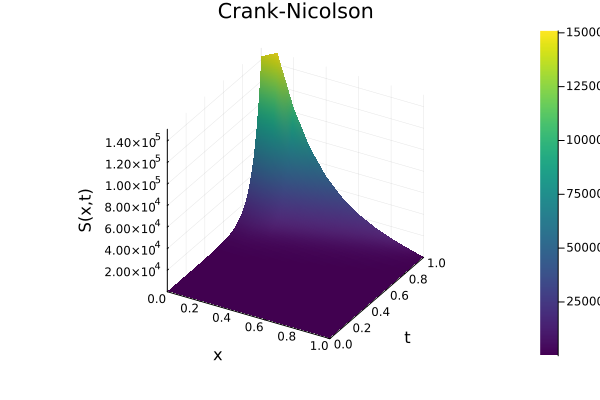

In [472]:
surface(x, t, S, camera=(30,30),
        c=:viridis, title="Crank-Nicolson",
        xlabel="x",ylabel="t",zlabel="S(x,t)")